In [1]:
!pip install jieba

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314478 sha256=111825dc21a6520c646e276e509732397a71bc30a69a2d9338fe4beb66d125d7
  Stored in directory: c:\users\su yunhua\appdata\local\pip\cache\wheels\7d\74\cf\08c94db4b784e2c1ef675a600b7b5b281fd25240dcb954ee7e
Successfully built jieba


In [7]:
!pip install snownlp

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760963 sha256=649cff02e888ce8e99dd160810338a186cd3a09cfdb636d9db972e8199a0873b
  Stored in directory: c:\users\su yunhua\appdata\local\pip\cache\wheels\64\3a\d2\0572cf9eb7022ac27ca0abc27ad4b37020fc26b111466d0438
Successfully built snownlp


In [6]:
# Define a function to extract the genre from the index
def get_genre(index):
    # Split the string by the '-' character and select the last word
    genre = index.split('-')[-1].strip('.txt').strip()
    return genre

df['Genre'] = df.index.map(get_genre)

df.head()

,Text,Genre
10分钟新闻早餐- 喜马头条 - 头条.txt,"每天10分钟唱小天下事,早上好,今天新鲜有价值的新闻早餐来了。\n 据唐山市公安局陆北芬局消...",头条
36氪·8点1氪- 36氪音频频道 - 科技.txt,本栏目由36g 独家出品\n 8.1g听互联网圈的新鲜事儿\n 今天是2022年11月3号 ...,科技
Sophia美剧精讲｜走遍美国- Sophia的英语学堂 - 影视.txt,"Hey guys, this is Sophia, welcome back to Fami...",影视
《三体》全集解析_中国科幻史诗级著作- DJ老赵 - 影视.txt,哈喽各位同学大家好\n 接下来三人就开始在这个小宇宙里无忧无虑的生活了起来\n 由于这里可以...,影视
《与神对话1》l 送给所有正在痛苦的人- 洛阡阡 - 健康.txt,"到這裡呢,《雨神對話1》的正文內容就全部結束了\n 作者尼爾·唐納德·沃爾什在最後的這些篇章...",健康


In [5]:
import os
import re
import pandas as pd

# Use the current directory
directory = '.'

# List to store DataFrames
dfs = []

# Iterate over files in directory
for filename in os.listdir(directory):
    # Ensure that we're working with text files
    if filename.endswith('.txt'):
        # Open each text file
        with open(os.path.join(directory, filename), 'r', encoding='utf8') as file:
            # Read the contents
            text = file.read()
            # Remove timestamps and unwanted characters
            cleaned_text = re.sub('\[\d\d:\d\d\.\d\d\d --> \d\d:\d\d\.\d\d\d\]', '', text)
            cleaned_text = cleaned_text.strip() # Remove leading and trailing white spaces
            # Create a DataFrame and append it to the list
            dfs.append(pd.DataFrame({'Text': [cleaned_text]}, index=[filename]))

# Concatenate all the DataFrames
df = pd.concat(dfs)

df.head()

,Text
10分钟新闻早餐- 喜马头条 - 头条.txt,"每天10分钟唱小天下事,早上好,今天新鲜有价值的新闻早餐来了。\n 据唐山市公安局陆北芬局消..."
36氪·8点1氪- 36氪音频频道 - 科技.txt,本栏目由36g 独家出品\n 8.1g听互联网圈的新鲜事儿\n 今天是2022年11月3号 ...
Sophia美剧精讲｜走遍美国- Sophia的英语学堂 - 影视.txt,"Hey guys, this is Sophia, welcome back to Fami..."
《三体》全集解析_中国科幻史诗级著作- DJ老赵 - 影视.txt,哈喽各位同学大家好\n 接下来三人就开始在这个小宇宙里无忧无虑的生活了起来\n 由于这里可以...
《与神对话1》l 送给所有正在痛苦的人- 洛阡阡 - 健康.txt,"到這裡呢,《雨神對話1》的正文內容就全部結束了\n 作者尼爾·唐納德·沃爾什在最後的這些篇章..."


In [8]:
from snownlp import SnowNLP
import jieba

# Define a function to calculate the sentiment score
def get_sentiment(text):
    # Tokenize the text with jieba
    words = ' '.join(jieba.cut(text, cut_all=False))
    # Calculate the sentiment score with SnowNLP
    sentiment = SnowNLP(words).sentiments
    return sentiment

# Apply the function to the 'Text' column to create the new 'Sentiment' column
df['Sentiment'] = df['Text'].apply(get_sentiment)


df.head()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\SUYUNH~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.659 seconds.
Prefix dict has been built successfully.


,Text,Genre,Sentiment
10分钟新闻早餐- 喜马头条 - 头条.txt,"每天10分钟唱小天下事,早上好,今天新鲜有价值的新闻早餐来了。\n 据唐山市公安局陆北芬局消...",头条,1.000000e+00
36氪·8点1氪- 36氪音频频道 - 科技.txt,本栏目由36g 独家出品\n 8.1g听互联网圈的新鲜事儿\n 今天是2022年11月3号 ...,科技,1.000000e+00
Sophia美剧精讲｜走遍美国- Sophia的英语学堂 - 影视.txt,"Hey guys, this is Sophia, welcome back to Fami...",影视,2.384342e-10
《三体》全集解析_中国科幻史诗级著作- DJ老赵 - 影视.txt,哈喽各位同学大家好\n 接下来三人就开始在这个小宇宙里无忧无虑的生活了起来\n 由于这里可以...,影视,1.000000e+00
《与神对话1》l 送给所有正在痛苦的人- 洛阡阡 - 健康.txt,"到這裡呢,《雨神對話1》的正文內容就全部結束了\n 作者尼爾·唐納德·沃爾什在最後的這些篇章...",健康,9.999859e-01


In [9]:
df.head(10)

,Text,Genre,Sentiment
10分钟新闻早餐- 喜马头条 - 头条.txt,"每天10分钟唱小天下事,早上好,今天新鲜有价值的新闻早餐来了。\n 据唐山市公安局陆北芬局消...",头条,1.000000e+00
36氪·8点1氪- 36氪音频频道 - 科技.txt,本栏目由36g 独家出品\n 8.1g听互联网圈的新鲜事儿\n 今天是2022年11月3号 ...,科技,1.000000e+00
Sophia美剧精讲｜走遍美国- Sophia的英语学堂 - 影视.txt,"Hey guys, this is Sophia, welcome back to Fami...",影视,2.384342e-10
《三体》全集解析_中国科幻史诗级著作- DJ老赵 - 影视.txt,哈喽各位同学大家好\n 接下来三人就开始在这个小宇宙里无忧无虑的生活了起来\n 由于这里可以...,影视,1.000000e+00
《与神对话1》l 送给所有正在痛苦的人- 洛阡阡 - 健康.txt,"到這裡呢,《雨神對話1》的正文內容就全部結束了\n 作者尼爾·唐納德·沃爾什在最後的這些篇章...",健康,9.999859e-01
《回魂三尸》恐怖悬疑鬼故事- w贺大叔 - 影视.txt,"第四本一十九集\n 我之前竟然一直给忽略了,张瞎子继续说道,\n 你想一想啊,要是蒋志元就是...",影视,1.000000e+00
《庆余年》的秘密- 文倩同学 - 影视.txt,"你好,我是文茜\n 最近我在看一部剧《庆于年》\n 同时也在读它的原著小说\n 《庆于年》这...",影视,1.000000e+00
《水皮杂谈-新辣日评》- 水皮杂谈 - 头条.txt,隨批雜談 一家之言 監聽者明 偏聽者暗\n 陳悶奢火揚吉慈虞\n 美國政府停擺已經進入了31...,头条,1.332268e-15
《股票大作手回忆录》- 闪灼大小姐 - 投资理财.txt,第24章\n 有些人有时候能打败某些股票\n 但没有人能永远打败整个股市\n 股民们总是希望...,投资理财,1.000000e+00
《金瓶梅》评书 （免费版）- 张金山书场 - 评书.txt,他們有的在說金平美是有很多的細節在寫男女之間的一些事情\n 然後有很多的網友在說\n 怎麼要...,评书,0.000000e+00


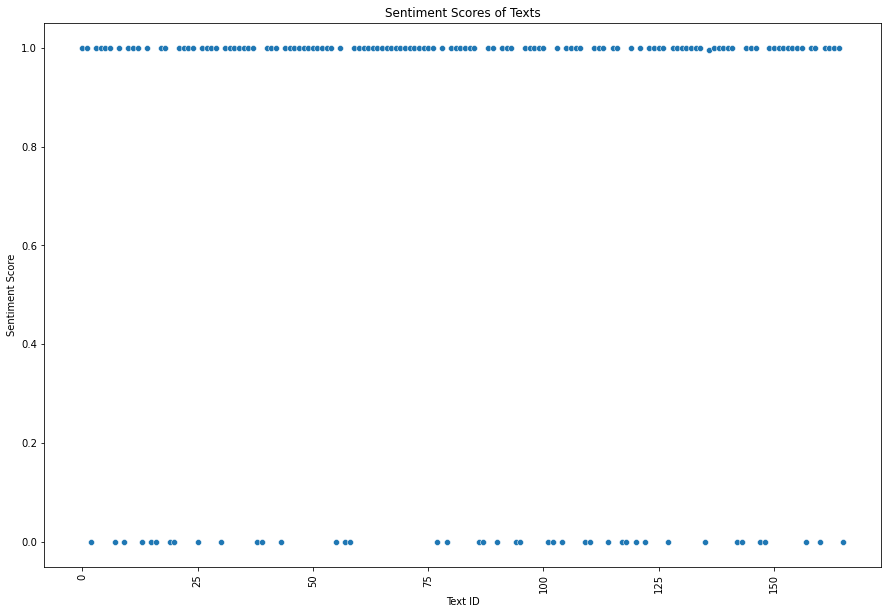

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index of the DataFrame and rename the index column to 'Text_Name'
df = df.reset_index().rename(columns={'index': 'Text_Name'})

# Create a scatterplot of the Sentiment scores
plt.figure(figsize=(15, 10))  # Set the figure size
sns.scatterplot(data=df, x=df.index, y='Sentiment')

# Set the title and labels of the plot
plt.title('Sentiment Scores of Texts')
plt.xlabel('Text ID')
plt.ylabel('Sentiment Score')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [13]:
print(df.loc[0, 'Text'])

每天10分钟唱小天下事,早上好,今天新鲜有价值的新闻早餐来了。
 据唐山市公安局陆北芬局消息,经唐山警方连夜开展工作,
 即抓获涉嫌在烧烤店寻衅滋事、暴力殴打他人案件两名主要犯罪嫌疑人之后,
 6月11号凌晨又抓获李某瑞等三名涉案人员,
 同时唐山公安机关已组织警力赴外省对其他四名外省籍涉案人员进行抓捕。
 人民日报消息,2022年6月10号,
 北京市朝阳区人民法院依法开庭审理了被告人吴亦凡强奸拒重淫乱一案,
 因涉及被害人隐私,案件依法采取不公开开庭审理方式,法院将依法择期宣判。
 6月10号,北京疫情防控新闻发布会上有关负责人介绍,
 截至目前,涉天堂超市酒吧聚集性疫情累计报告29例感染者,
 同时已判定密接4402人,次密接52人,均已落实管控措施。
 6月10号,中国汽车工业协会发布的最新数据显示,
 今年5月份,国内汽车销量186.2万辆,环比增长57.6%,同比下滑12.6%,
 其中,5月份新能源汽车单月销量44.7万辆,同比增长105.2%,
 1月份至5月份累计销量200.3万辆,同比增长111.2%,
 新能源汽车行业正保持高速增长态势。
 6月10号,国家邮政局副局长戴应军介绍,我国快件最高日处理能力达到7亿件,
 10年来,快递业务量从57亿件增长到1083亿件,是原来的19倍,以连续8年位居世界第一。
 邮政快递业在服务国家重大战略抗议、保工、保通、保畅等方面发挥重要作用,
 为打通大动脉、畅通微循环做出行业贡献。
 近日,哈尔滨工业大学为2022级新生准备了带有金刚石或蓝宝石的硬核录取通知书。
 录取通知书外形酷似芯片主板,未来科技感十足。
 而学校自主研制的金刚石或蓝宝石则封固在录取通知书的右侧。
 对于近期多个国家报告出现喉痘确诊病例,中国疾控中心病毒病所所长许文波介绍,
 中国具备发现潜在输入喉痘病例的检测能力。
 中国CDC病毒病所已建立了针对喉痘病毒基因双把标的荧光PRC方法。
 已经对其敏感性和特异性在非洲塞拉利昂进行验证。
 所以,我国有能力通过对疑似输入病例的临床标本,开展荧光PRC检测喉痘病毒的基因。
 美国国防部当初提供了专属专属专属专属专属专属专属专属专属专属。
 美国国防部当地时间6月10号证实,美国军方已经出现了第一例喉痘病例。
 感染者为驻扎在德国斯图加特的美国现役军人。
 目前,军方正在对感染者有过密切接触